<a href="https://colab.research.google.com/github/admaesmo/ScienceEducationAnalitics/blob/main/science_teacher_graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graficas a partir de datos limpio  Encuesta Profesores

En el presente documento Se realizarán las graficas a partir de el dataset limpio que se trabajaó en el otro documento Colab.



In [21]:
# mportamos archivodataseheet
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
#dfCompleto = pd.read_csv('/content/drive/My Drive/proyectoCaro/EncuestaCompleta.csv') // encuesta inicial sin modificaciones
EncuestaMod1 = pd.read_csv('/content/drive/My Drive/ProyectoArticulo/Datos/Datos Trabajados 3.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [13]:
EncuestaMod1.head(5)


,area Dictada,grado 6,grado 7,grado 8,grado 9,grado 10,grado 11,Decreto que lo rige:,I.E,Carácter I.E,...,Concepcion 4,Concepcion 5,Licenciatura,Profesional,Especializacion CN,Especilizacion Ed,Maestria CN,Maestria Ed,Doctorado CN,Doctorado Ed
0,"Biología, Química",0,0,1,1,1,1,1278,Ciudad don Bosco,Oficial,...,Completamente de Acuerdo,Completamente de Acuerdo,1,0,0.0,1,0,0,0,0
1,Biología,1,1,1,0,0,0,1278,Ciudad Don Bosco,Oficial,...,Completamente de Acuerdo,Completamente de Acuerdo,0,1,0.0,1,0,0,0,0
2,Física,1,1,0,0,1,1,1278,Asamble Departamental,Oficial,...,Completamente de Acuerdo,Completamente de Acuerdo,0,0,0.0,0,1,1,0,0
3,Biología,1,0,1,0,0,0,1278,Asamblea departamental,Oficial,...,Completamente de Acuerdo,Completamente de Acuerdo,0,1,0.0,0,0,0,0,0
4,Biología,0,0,1,1,0,0,1278,I.E Asamblea Departamental,Oficial,...,Completamente de Acuerdo,Completamente de Acuerdo,0,1,0.0,0,1,0,0,0


<Figure size 1400x800 with 0 Axes>

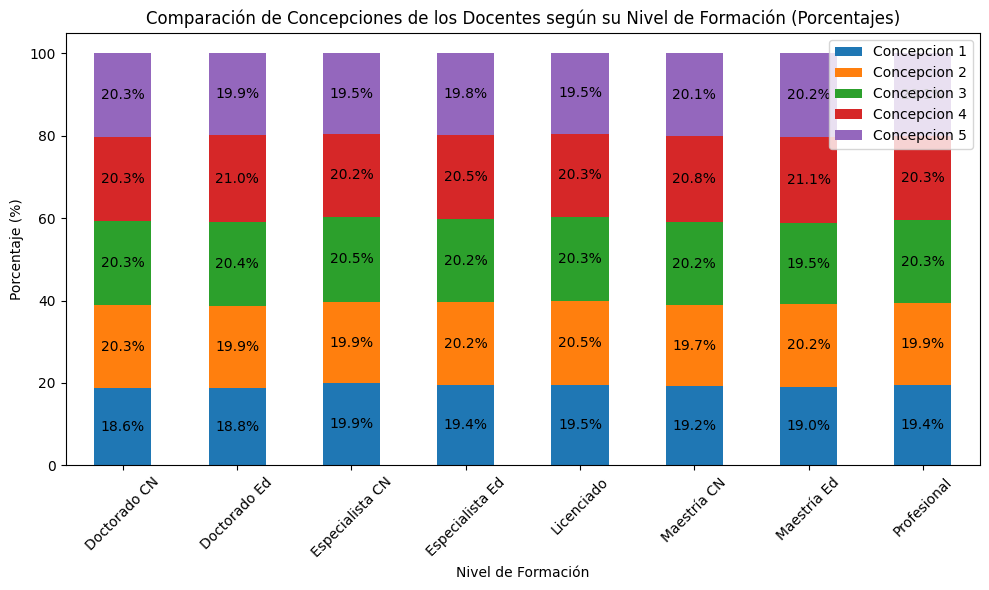

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Mapeo de las respuestas textuales a valores numéricos
concepciones_mapping = {
    'Completamente de Acuerdo': 4,
    'Parcialmente de Acuerdo': 3,
    'Indeciso': 2,
    'Parcialmente en Desacuerdo': 1,
    'Completamente en Desacuerdo': 0
}

# Aplicamos el mapeo a las columnas de concepciones
concepciones_columns = ['Concepcion 1', 'Concepcion 2', 'Concepcion 3', 'Concepcion 4', 'Concepcion 5']
for col in concepciones_columns:
    EncuestaMod1[col] = EncuestaMod1[col].map(concepciones_mapping)

# Filtramos las columnas de concepciones y niveles de formación
formacion_columns = ['Licenciatura', 'Profesional', 'Especializacion CN', 'Especilizacion Ed',
                     'Maestria CN', 'Maestria Ed', 'Doctorado CN', 'Doctorado Ed']

# Crear una nueva columna que contenga el nombre del nivel de formación en función de los valores 0 o 1
def obtener_nivel_formacion(row):
    if row['Doctorado CN'] == 1:
        return "Doctorado CN"
    elif row['Doctorado Ed'] == 1:
        return "Doctorado Ed"
    elif row['Maestria CN'] == 1:
        return "Maestría CN"
    elif row['Maestria Ed'] == 1:
        return "Maestría Ed"
    elif row['Especializacion CN'] == 1:
        return "Especialista CN"
    elif row['Especilizacion Ed'] == 1:
        return "Especialista Ed"
    elif row['Licenciatura'] == 1:
        return "Licenciado"
    else:
        return "Profesional"

# Aplicamos la función para obtener el nivel de formación y agregarlo como una nueva columna
df_concepciones_formacion['Nivel de Formación'] = df_concepciones_formacion.apply(obtener_nivel_formacion, axis=1)

# Agrupamos por el nivel de formación y sumamos las concepciones para obtener los totales
df_totales = df_concepciones_formacion.groupby('Nivel de Formación')[concepciones_columns].sum()

# Convertimos los valores en porcentajes dividiendo cada valor por la suma total por fila (nivel de formación)
df_porcentajes = df_totales.div(df_totales.sum(axis=1), axis=0) * 100

# Configuramos el tamaño de la figura
plt.figure(figsize=(14, 8))

# Graficamos el gráfico de barras apilado con porcentajes
ax = df_porcentajes.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadimos etiquetas y títulos
plt.title('Comparación de Concepciones de los Docentes según su Nivel de Formación (Porcentajes)')
plt.xlabel('Nivel de Formación')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)

# Añadir etiquetas de porcentaje en cada sección de la barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Grafica para conocer distribución docente
Queremos Conocer la proporción de docentes según su nivel de formación docente

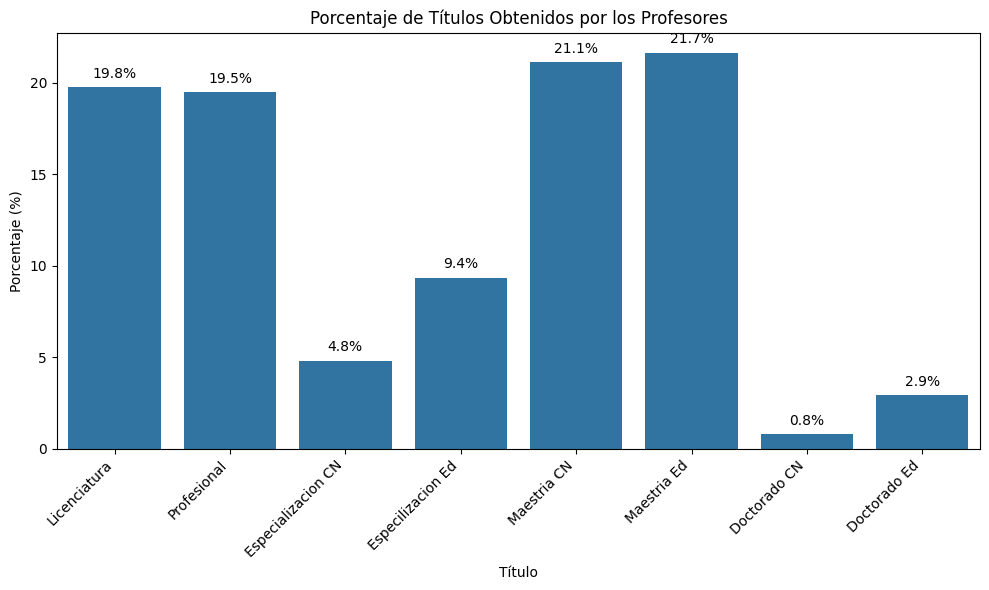

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa los datos y cuenta la frecuencia de cada título
titulos = ['Licenciatura', 'Profesional', 'Especializacion CN', 'Especilizacion Ed',
           'Maestria CN', 'Maestria Ed', 'Doctorado CN', 'Doctorado Ed']
conteo_titulos = EncuestaMod1[titulos].sum()

# Calcula el porcentaje
total_titulos = conteo_titulos.sum()
porcentaje_titulos = (conteo_titulos / total_titulos) * 100

# Crea un gráfico de barras con porcentajes
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=porcentaje_titulos.index, y=porcentaje_titulos.values)

# Añadir los porcentajes encima de cada barra
for i, value in enumerate(porcentaje_titulos):
    ax.text(i, value + 0.5, f'{value:.1f}%', ha='center')

# Añadir títulos y etiquetas
plt.title('Porcentaje de Títulos Obtenidos por los Profesores')
plt.xlabel('Título')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Nivel y área de formación (En este apartado marque una o varias opciones según el caso) cambiado por *nivel de formación*.


### Conocimiento disciplinar
 se cambian los nombres de los encabezado e conocimientodisciplinar
 - Conocimiento disciplinar: [Estudio conceptos modernos de las ciencias naturales e indago sobre los últimos avances científicos en mi área de especialidad para dárselos a conocer a mis estudiantes.]
 se remplaza  *Conocimiento disciplinar 1*

 - Conocimiento disciplinar:  [Utilizo múltiples fuentes para preparar y orientar las clases de ciencias naturales, teniendo en cuenta las relaciones entre los conceptos científicos y su aplicación en otras áreas del conocimiento.]
 se reemplaza por *Conocimiento Disciplinar 2*

 -Conocimiento disciplinar:  [Asisto a cursos de formación y actualización relacionados con la enseñanza de ciencias naturales por iniciativa propia y cuando me los ofrecen.]
 se reemplaza por *conocimiento Disciplinar 3*

 - Conocimiento disciplinar: [Considero que las matemáticas les dan fundamento teórico a los hallazgos científicos buscando explicar los fenómenos naturales mediante modelos matemáticos.]
 se reemplaza por conocimiento disciplionar 4

Valores cualitativos a ser renombrados
- Actitudes y valores [Pienso que la ciencia hace parte de la cultura y por tanto sus investigaciones obedecen a factores culturales y sociales que influyen sobre ella.]
 se reemplaza por *actitudes*

- Habilidades procedimentales [Construyo mi propio material para la enseñanza de las ciencias naturales y favorezco el uso de TIC por parte de los estudiantes para apoyar el aprendizaje de estas.]
  se reemplaza po *construir material*
- Habilidades procedimentales [Diseño y llevo a cabo proyectos investigativos en ciencias naturales de acuerdo con el contexto en que se encuentran los estudiantes, dándoles un papel más activo (exposiciones, prácticas de laboratorio, salidas de campo, debates, entre otros).]
se reemplasa por *Diseño Proyectos*



### Actitudes y Valores.

se reemplazaran los encabezados de
- Actitudes y valores [Considero que los científicos se ven influenciados por sus convicciones morales y éticas para actuar en investigaciones que pueden afectar a la sociedad positiva o negativamente.]
se reempalza por Actitud 1

- Actitudes y valores [En el proceso de enseñanza de las ciencias naturales utilizo la historia, la epistemología y la metódica de las ciencias naturales para tratar temáticas específicas del área.]
se reemplaza por *Actitud 2*

- Actitudes y valores [Planteo en mis clases las relaciones de las ciencias naturales con otras áreas del conocimiento (historia, filosofía, medicina, etc), en especial con la tecnología y las implicaciones que esta tiene en la sociedad.]
se remplaza por *Actitud 3*

- Actitudes y valores [Pienso que la ciencia hace parte de la cultura y por tanto sus investigaciones obedecen a factores culturales y sociales que influyen sobre ella.]
se reemplaza por *Actitud 4*


### habilidades
- Habilidades procedimentales [Construyo mi propio material para la enseñanza  de las ciencias naturales  y favorezco el uso de TIC por parte de los estudiantes para apoyar el aprendizaje de estas.]
se reemplaza por *Habilidad 1*
-Habilidades procedimentales [Diseño y llevo a cabo proyectos investigativos en ciencias naturales de acuerdo con el contexto en que se encuentran los estudiantes, dándoles un papel más activo (exposiciones, prácticas de laboratorio, salidas de campo,  debates, entre otros).]
se reemplaza por *Habilidad 2*
- Habilidades procedimentales [Privilegio la clase magistral  utilizando textos guía en las sesiones de clase de ciencias naturales.]
Se reemplaza por *Habilidad 3*
- Habilidades procedimentales [Implemento con los estudiantes proyectos de investigación de manera interdisciplinaria con otras áreas del conocimiento, incluyendo conceptos científicos aplicables a situaciones reales.]
Se reemplaza por *Habilidad 4*


### las concepciones de educación se cambian por
- Concepción de Ciencia [El conocimiento científico y particularmente el referido a las ciencias naturales, parte de la experiencia del ser humano y cualquier ley o teoría que se establezca debe ser verificada mediante la experimentación.]
Se reemplaza por *Concepcion 1*
- Concepción de Ciencia [El conocimiento científico surge por la necesidad de solucionar problemas, dar respuesta a preguntas hechas por el hombre, por lo que es indispensable la creatividad  de los investigadores para solucionar o responder a estas.]
Se reemplaza por *Concepcion 2*

- Concepción de Ciencia [El conocimiento científico siempre será susceptible de ser modificado o cuestionado, puesto que se puede llegar a construir nuevos conocimientos que refuten lo actualmente establecido.]
Se reemplaza por *Concepcion 3*

- Concepción de Ciencia [Las ciencias naturales como fuente fundamental de conocimiento y su enseñanza  permite desarrollar capacidades de pensamiento y actuación en su contexto.]
Se reemplza por *Concepcion 4*

- Concepción de Ciencia [Enseñar y aprender ciencias naturales es indispensable para que los individuos se adapten mejor a la sociedad actual y puedan conocer más de cerca el mundo que los rodea. ]
Se reemplaza por *Concepcion 5*


```
Licenciatura	,Profesional,Especializacion CN,Especilizacion Ed,Maestria CN,Maestria Ed,Doctorado CN,Doctorado Ed
```


Primero filtremos el DataFrame para incluir solo las columnas relevantes:

In [7]:
# Selecciona las columnas de interés
columnas = ['Doctorado CN', 'Doctorado Ed', 'Concepcion 1']
df_filtrado = EncuestaMod1[columnas]
# Filtra el DataFrame para incluir solo profesores con al menos un doctorado
df_filtrado = df_filtrado[
    (df_filtrado['Doctorado CN'] == 1) | (df_filtrado['Doctorado Ed'] == 1)
]
# Crea una tabla de contingencia
tabla_contingencia = pd.crosstab(
    [df_filtrado['Doctorado CN'], df_filtrado['Doctorado Ed']],
    df_filtrado['Concepcion 1']
)

# Imprime la tabla
print(tabla_contingencia)

Concepcion 1               Completamente de Acuerdo  \
Doctorado CN Doctorado Ed                             
0            1                                    7   
1            0                                    2   

Concepcion 1               Completamente en Desacuerdo  \
Doctorado CN Doctorado Ed                                
0            1                                       1   
1            0                                       0   

Concepcion 1               Parcialmente de Acuerdo  Parcialmente en Desacuerdo  
Doctorado CN Doctorado Ed                                                       
0            1                                   2                           1  
1            0                                   1                           0  


Mapa de calor comparativa

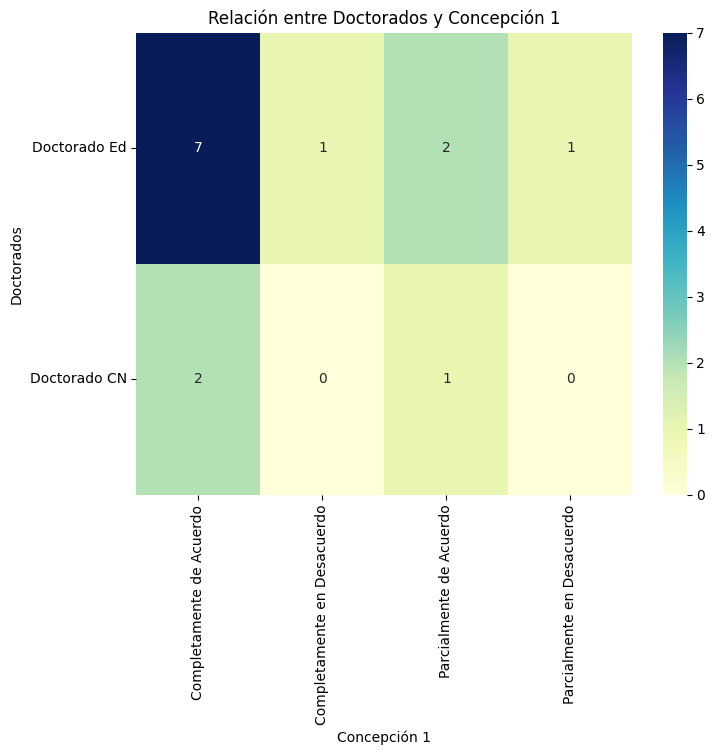

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# ... (código para crear la tabla de contingencia) ...

# Crea el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Relación entre Doctorados y Concepción 1")
plt.xlabel("Concepción 1")
plt.ylabel("Doctorados")
etiquetas_y = ["Doctorado Ed", "Doctorado CN"]  # Nuevas etiquetas
plt.yticks([0.5, 1.5], etiquetas_y, rotation=0)  # Ajusta la posición de las etiquetas
plt.show()

Primero, crea una tabla de contingencia usando pd.crosstab:

Después, crea el mapa de calor usando seaborn:

In [ ]:
EncuestaMod1.head(5)

,area Dictada,grado 6,grado 7,grado 8,grado 9,grado 10,grado 11,Decreto que lo rige:,I.E,Carácter I.E,Nivel formación,Titulo,otro estudio,Años Experiencia,Conocimiento Disciplinar 1,Conocimiento Dsciplinar 2,Conocimiento Disciplinar 3,Conocimiento disciplinar 4,Actitud 1,Actitud 2,Actitud 3,Actitud 4,Habilidad 1,Habilidad 2,Habilidad 3,Habilidad 4,Concepcion 1,Concepcion 2,Concepcion 3,Concepcion 4,Concepcion 5,Licenciatura,Profesional,Especializacion CN,Especilizacion Ed,Maestria CN,Maestria Ed,Doctorado CN,Doctorado Ed
0,"Biología, Química",0,0,1,1,1,1,1278,Ciudad don Bosco,Oficial,Especialista,"Licenciada en educación básica, Ciencias Natur...",He realizado cursos y/o diplomados relacionado...,Entre 16 y 20,Casi Siempre,Algunas Veces,Algunas Veces,Siempre,Siempre,Algunas Veces,Algunas Veces,Siempre,Algunas Veces,Algunas Veces,Algunas Veces,Casi Siempre,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,1,0,0.0,1,0,0,0,0
1,Biología,1,1,1,0,0,0,1278,Ciudad Don Bosco,Oficial,"Profesional no licenciado, Especialista","Zootecnista, Especialista en informática para ...",He participado como expositor en congresos u o...,Entre 16 y 20,Siempre,Siempre,Algunas Veces,Casi Siempre,Nunca,Algunas Veces,Siempre,Algunas Veces,Siempre,Siempre,Nunca,Siempre,Parcialmente de Acuerdo,Parcialmente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,0,1,0.0,1,0,0,0,0
2,Física,1,1,0,0,1,1,1278,Asamble Departamental,Oficial,Magíster,Magister en enseñanza de la ciencias,He participado como expositor en congresos u o...,Entre 16 y 20,Casi Siempre,Casi Siempre,Algunas Veces,Siempre,Algunas Veces,Siempre,Siempre,Siempre,Casi Siempre,Raras Veces,Nunca,Nunca,Completamente de Acuerdo,Parcialmente en Desacuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,0,0,0.0,0,1,1,0,0
3,Biología,1,0,1,0,0,0,1278,Asamblea departamental,Oficial,Profesional no licenciado,Biología con Enfasis en Biotecnología,He realizado cursos y/o diplomados relacionado...,Entre 16 y 20,Algunas Veces,Casi Siempre,Raras Veces,Siempre,Casi Siempre,Siempre,Siempre,Siempre,Casi Siempre,Casi Siempre,Casi Siempre,Algunas Veces,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,0,1,0.0,0,0,0,0,0
4,Biología,0,0,1,1,0,0,1278,I.E Asamblea Departamental,Oficial,"Profesional no licenciado, Magíster","Biológigo, Maestría en la Enseñanza de las Cie...",He participado como expositor en congresos u o...,Entre 11 y 15,Casi Siempre,Casi Siempre,Casi Siempre,Siempre,Algunas Veces,Siempre,Casi Siempre,Siempre,Siempre,Casi Siempre,Algunas Veces,Siempre,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,0,1,0.0,0,1,0,0,0


## expandimos tabla de contingencia a más profesiones

In [ ]:
import pandas as pd

# Suponiendo que 'EncuestaMod1' es tu DataFrame

# Selecciona las columnas de interés
columnas = ['Especializacion CN', 'Especilizacion Ed', 'Maestria CN', 'Maestria Ed',
           'Doctorado CN', 'Doctorado Ed', 'Concepcion 1']
df_filtrado = EncuestaMod1[columnas]

# Crea la tabla de contingencia
tabla_contingencia = pd.crosstab(
    [df_filtrado['Especializacion CN'], df_filtrado['Especilizacion Ed'],
     df_filtrado['Maestria CN'], df_filtrado['Maestria Ed'],
     df_filtrado['Doctorado CN'], df_filtrado['Doctorado Ed']],
    df_filtrado['Concepcion 1']
)

# Imprime la tabla
print(tabla_contingencia)

Concepcion 1                                                                            Completamente de Acuerdo  \
Especializacion CN Especilizacion Ed Maestria CN Maestria Ed Doctorado CN Doctorado Ed                             
0.0                0                 0           0           0            0                                   42   
                                                                          1                                    3   
                                                 1           0            0                                   17   
                                                                          1                                    0   
                                     1           0           0            0                                   16   
                                                                          1                                    1   
                                                             1          

modificacion a la tabla de contingencia para volverla 2d

<ipython-input-88-de67f316e392>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Nivel de Titulación'] = df_filtrado.apply(obtener_nivel_titulacion, axis=1)


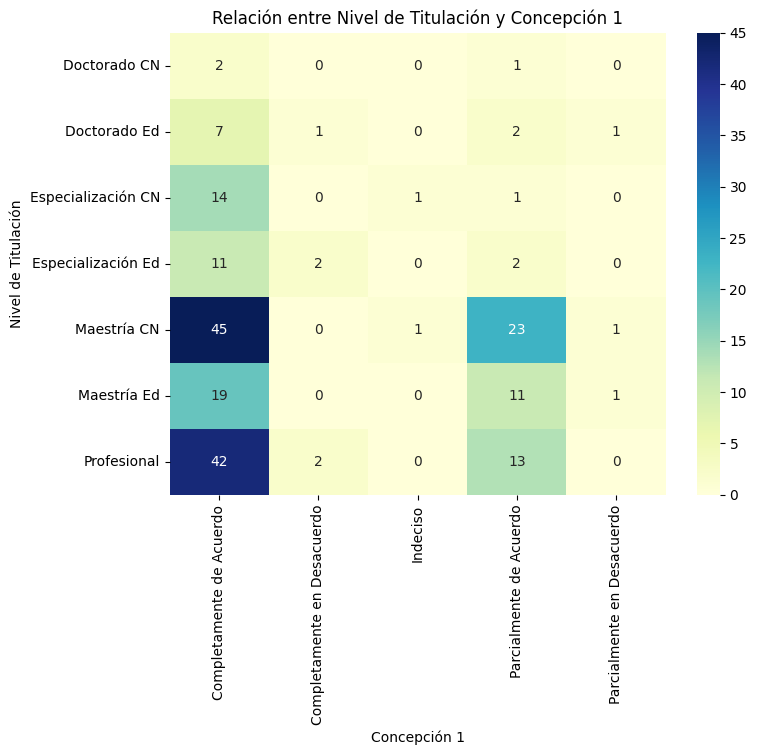

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (código para crear la tabla de contingencia) ...

# Crea una nueva columna "Nivel de Titulación"
def obtener_nivel_titulacion(row):
  if row['Doctorado CN'] == 1 :
    return "Doctorado CN"
  elif row['Doctorado Ed'] == 1:
    return "Doctorado Ed"
  elif row['Maestria CN'] == 1 :
    return "Maestría CN"
  elif row['Maestria Ed'] == 1 :
    return "Maestría Ed"
  elif row['Especializacion CN'] == 1:
    return "Especialización CN"
  elif row['Especilizacion Ed'] == 1:
    return "Especialización Ed"
  elif row['Especilizacion Ed'] == 1:
    return "Especialización Ed"
  else:
    return "Profesional"

df_filtrado['Nivel de Titulación'] = df_filtrado.apply(obtener_nivel_titulacion, axis=1)

# Crea una nueva tabla de contingencia con la columna agrupada
tabla_contingencia_agrupada = pd.crosstab(
    df_filtrado['Nivel de Titulación'],
    df_filtrado['Concepcion 1']
)

# Crea el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_contingencia_agrupada, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Relación entre Nivel de Titulación y Concepción 1")
plt.xlabel("Concepción 1")
plt.ylabel("Nivel de Titulación")
plt.show()

## **Exportar a hoja de calculo **

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1lK_RV5Drxmt023smdGhSrOm6Q7aB5FQV_fXvSdABMEI/edit?gid=0#gid=0')
worksheet = sh.get_worksheet(1)

In [ ]:
df_tabla = pd.DataFrame(tabla_contingencia)
df_tabla.head(5)

Concepcion 1                                                                            Completamente de Acuerdo  \
Especializacion CN Especilizacion Ed Maestria CN Maestria Ed Doctorado CN Doctorado Ed                             
0.0                0                 0           0           0            0                                   42   
                                                                          1                                    3   
                                                 1           0            0                                   17   
                                                                          1                                    0   
                                     1           0           0            0                                   16   

Concepcion 1                                                                            Completamente en Desacuerdo  \
Especializacion CN Especilizacion Ed Maestria CN Maestria Ed Doctorado CN Doctorado Ed                                
0.0                0                 0           0           0            0                                       2   
                                                                          1                                       0   
                                                 1           0            0                                       0   
                                                                          1                                       0   
                                     1           0           0            0                                       0   

Concepcion 1                                                                            Indeciso  \
Especializacion CN Especilizacion Ed Maestria CN Maestria Ed Doctorado CN Doctorado Ed             
0.0                0                 0           0           0            0                    0   
                                                                          1                    0   
                                                 1           0            0                    0   
                                                                          1                    0   
                                     1           0           0            0                    1   

Concepcion 1                                                                            Parcialmente de Acuerdo  \
Especializacion CN Especilizacion Ed Maestria CN Maestria Ed Doctorado CN Doctorado Ed                            
0.0                0                 0           0           0            0                                  13   
                                                                          1                                   0   
                                                 1           0            0                                  10   
                                                                          1                                   1   
                                     1           0           0            0                                   6   

Concepcion 1                                                                            Parcialmente en Desacuerdo  
Especializacion CN Especilizacion Ed Maestria CN Maestria Ed Doctorado CN Doctorado Ed                              
0.0                0                 0           0           0            0                                      0  
                                                                          1                                      0  
                                                 1           0            0                                      1  
                                                                          1                                      0  
                                     1           0           0            0                                      1

In [ ]:
worksheet.update([df_tabla.columns.values.tolist()] + df_tabla.values.tolist())

{'spreadsheetId': '1lK_RV5Drxmt023smdGhSrOm6Q7aB5FQV_fXvSdABMEI',
 'updatedRange': "'Hoja 2'!A1:E18",
 'updatedRows': 18,
 'updatedColumns': 5,
 'updatedCells': 90}

In [ ]:
EncuestaMod1.head(10)

,area Dictada,grado 6,grado 7,grado 8,grado 9,grado 10,grado 11,Decreto que lo rige:,I.E,Carácter I.E,Nivel formación,Titulo,otro estudio,Años Experiencia,Conocimiento Disciplinar 1,Conocimiento Dsciplinar 2,Conocimiento Disciplinar 3,Conocimiento disciplinar 4,Actitud 1,Actitud 2,Actitud 3,Actitud 4,Habilidad 1,Habilidad 2,Habilidad 3,Habilidad 4,Concepcion 1,Concepcion 2,Concepcion 3,Concepcion 4,Concepcion 5,Licenciatura,Profesional,Especializacion CN,Especilizacion Ed,Maestria CN,Maestria Ed,Doctorado CN,Doctorado Ed
0,"Biología, Química",0,0,1,1,1,1,1278,Ciudad don Bosco,Oficial,Especialista,"Licenciada en educación básica, Ciencias Natur...",He realizado cursos y/o diplomados relacionado...,Entre 16 y 20,Casi Siempre,Algunas Veces,Algunas Veces,Siempre,Siempre,Algunas Veces,Algunas Veces,Siempre,Algunas Veces,Algunas Veces,Algunas Veces,Casi Siempre,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,1,0,0.0,1,0,0,0,0
1,Biología,1,1,1,0,0,0,1278,Ciudad Don Bosco,Oficial,"Profesional no licenciado, Especialista","Zootecnista, Especialista en informática para ...",He participado como expositor en congresos u o...,Entre 16 y 20,Siempre,Siempre,Algunas Veces,Casi Siempre,Nunca,Algunas Veces,Siempre,Algunas Veces,Siempre,Siempre,Nunca,Siempre,Parcialmente de Acuerdo,Parcialmente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,0,1,0.0,1,0,0,0,0
2,Física,1,1,0,0,1,1,1278,Asamble Departamental,Oficial,Magíster,Magister en enseñanza de la ciencias,He participado como expositor en congresos u o...,Entre 16 y 20,Casi Siempre,Casi Siempre,Algunas Veces,Siempre,Algunas Veces,Siempre,Siempre,Siempre,Casi Siempre,Raras Veces,Nunca,Nunca,Completamente de Acuerdo,Parcialmente en Desacuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,0,0,0.0,0,1,1,0,0
3,Biología,1,0,1,0,0,0,1278,Asamblea departamental,Oficial,Profesional no licenciado,Biología con Enfasis en Biotecnología,He realizado cursos y/o diplomados relacionado...,Entre 16 y 20,Algunas Veces,Casi Siempre,Raras Veces,Siempre,Casi Siempre,Siempre,Siempre,Siempre,Casi Siempre,Casi Siempre,Casi Siempre,Algunas Veces,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,0,1,0.0,0,0,0,0,0
4,Biología,0,0,1,1,0,0,1278,I.E Asamblea Departamental,Oficial,"Profesional no licenciado, Magíster","Biológigo, Maestría en la Enseñanza de las Cie...",He participado como expositor en congresos u o...,Entre 11 y 15,Casi Siempre,Casi Siempre,Casi Siempre,Siempre,Algunas Veces,Siempre,Casi Siempre,Siempre,Siempre,Casi Siempre,Algunas Veces,Siempre,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,0,1,0.0,0,1,0,0,0
5,Biología,0,0,1,1,0,1,1278,El Viajano,Oficial,"Profesional no licenciado, Especialista","Bióloga con énfasis en biotecnología, especial...",He participado como expositor en congresos u o...,Entre 16 y 20,Siempre,Siempre,Siempre,Siempre,Casi Siempre,Casi Siempre,Siempre,Algunas Veces,Siempre,Siempre,Nunca,Siempre,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,0,1,0.0,0,0,0,0,0
6,Biología,1,1,0,0,0,0,2277,InstitionE. Asamblea Departamental,Oficial,Especialista,"Lic en Biología y Química, Especialista en Edu...",He realizado cursos y/o diplomados relacionado...,Más de 20,Casi Siempre,Casi Siempre,Algunas Veces,Casi Siempre,Algunas Veces,Siempre,Casi Siempre,Casi Siempre,Casi Siempre,Casi Siempre,Nunca,Algunas Veces,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,Completamente de Acuerdo,1,0,1.0,0,0,0,0,0
7,Biología,0,0,1,0,0,0,1278,San Antonio De Prado,Oficial,"Profesional no licenciado, Especialista","Administradora Ambiental, Especialista en educ...",He realizado cursos y/o diplomado

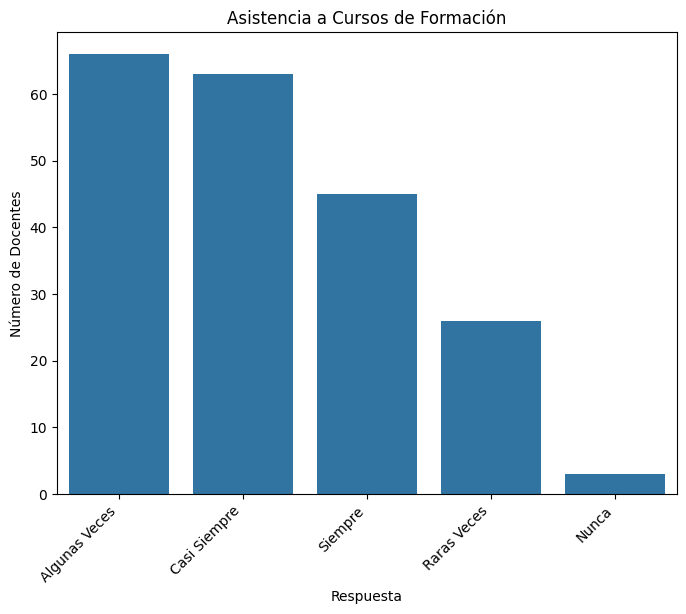

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las respuestas
conteo_asistencia = EncuestaMod1['Conocimiento Disciplinar 3'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_asistencia.index, y=conteo_asistencia.values)
plt.title('Asistencia a Cursos de Formación')
plt.xlabel('Respuesta')
plt.ylabel('Número de Docentes')
plt.xticks(rotation=45, ha='right')
plt.show()

## analizamos las concepciones d elso docentes


mejorado